## Importing the Required Librarys

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re         #regular Expression
import string     #Collection of unique Words
import warnings
warnings.filterwarnings('ignore')

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

### Importing the DataSets

In [4]:
fake = pd.read_csv("fake.csv")
true = pd.read_csv("true.csv")

### Data Cleaning Operations

In [5]:
# Assigning the target to the dataset
fake['class'] = 0
true ['class'] = 1

In [6]:
# printing the Shape of the data
fake.shape,true.shape

((23481, 5), (21417, 5))

In [7]:
print("Fake data Column Names :",fake.columns)
print("True data Column Names :",true.columns)

Fake data Column Names : Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')
True data Column Names : Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')


In [8]:
print("Fake data Information :",fake.info())
print("True data Information :",true.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   class    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB
Fake data Information : None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   class    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB
True data Information : None


In [9]:
print("Fake data Information :\n",fake.isnull().sum())
print("True data Information :\n",true.isnull().sum())

Fake data Information :
 title      0
text       0
subject    0
date       0
class      0
dtype: int64
True data Information :
 title      0
text       0
subject    0
date       0
class      0
dtype: int64


In [10]:
# Removing the last 10 rows for manual testing
fake_manual_testing = fake.tail(10)
for i in range(23480,23470,-1):
    fake.drop([i],axis = 0, inplace = True )
    
true_manual_testing = true.tail(10)
for i in range(21416,21406,-1):
    true.drop([i],axis = 0, inplace = True )
    

In [11]:
fake.shape,true.shape

((23471, 5), (21407, 5))

fake.shape,true.shape

In [12]:
fake_manual_testing['class'] = 0
true_manual_testing['class'] = 1

In [13]:
fake_manual_testing.tail(2)

,title,text,subject,date,class
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [14]:
# mearging the 2 datasets
df = pd.concat([fake,true],axis = 0)
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1


In [15]:
df.shape

(44878, 5)

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


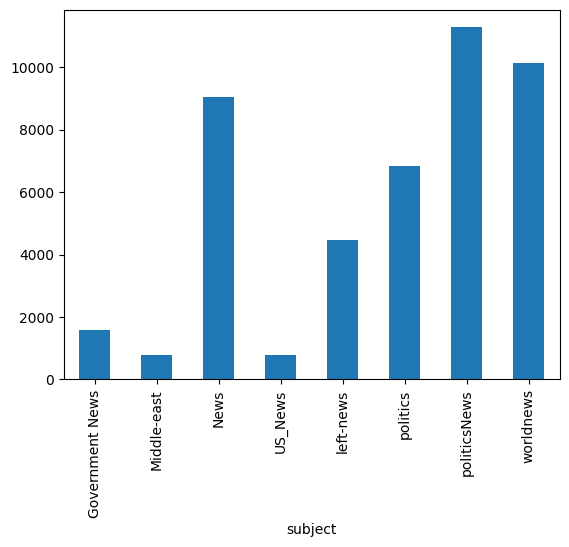

In [16]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [17]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
df['Text'] = df['title'] + ',' + df['text']

In [19]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class', 'Text'], dtype='object')

In [20]:
# Droping the Unvanted Columns in the dataset
data = df.drop(['title','subject','date','text'],axis = 1)

In [21]:
data.columns

Index(['class', 'Text'], dtype='object')

In [22]:
#Checking the dataSet
data.isnull().sum()

class    0
Text     0
dtype: int64

In [23]:
# Random Shuffil of the dataset
data = data.sample(frac = 1)

In [24]:
data.head()

,class,Text
12089,0,"NUT JOB GLENN BECK Joins Liberal, Foul-Mouthed..."
11660,1,Indonesian police warn Islamists against raids...
7365,0,Samantha Bee BLASTS GOP Over ‘C*ckblocking’ O...
20077,0,WATCH: HARRY REID Caught Calling Benghazi Moth...
15319,0,Watch Judge Jeanine Offer The DEFINITIVE Crimi...


In [25]:
#Removing the index
data.reset_index(inplace = True )
data.drop(["index"],axis = 1 , inplace = True)

In [26]:
data.columns

Index(['class', 'Text'], dtype='object')

In [27]:
data.head()

,class,Text
0,0,"NUT JOB GLENN BECK Joins Liberal, Foul-Mouthed..."
1,1,Indonesian police warn Islamists against raids...
2,0,Samantha Bee BLASTS GOP Over ‘C*ckblocking’ O...
3,0,WATCH: HARRY REID Caught Calling Benghazi Moth...
4,0,Watch Judge Jeanine Offer The DEFINITIVE Crimi...


#### Data Pre - processing 

In [28]:
# cresting the function for removing the special characters
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]',' ',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

data['Text'] = data["Text"].apply(word_drop)

In [29]:
#Creating the Dependent and Independent Variables
x = data['Text']
y = data['class']

In [30]:
print(x.shape)
print(y.shape)

(44878,)
(44878,)


### Splitting the Data For Fitting the Processing Data 

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 )

In [129]:
print(xv_train.shape)

(33658, 95699)


In [130]:
print(xv_test.shape)

(11220, 95699)


In [131]:
v = TfidfVectorizer()
xv_train = v.fit_transform(x_train)
xv_test = v.transform(x_test)

# Model Fitting 

### LogisticRegression

In [33]:
lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [34]:
pred_lr = lr.predict(xv_test)

In [124]:
xlr = lr.score(xv_test,y_test)
ylr = lr.score(xv_train,y_train)
print("Model Testing Accuracy --->",xlr)
print("Model Training Accuracy --->",ylr)

Model Testing Accuracy ---> 0.9867201426024955
Model Training Accuracy ---> 0.9920969754590291


In [37]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5916
           1       0.99      0.99      0.99      5304

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



###  DecisionTreeClassifier

In [38]:
model_DT = DecisionTreeClassifier()
model_DT.fit(xv_train,y_train)

DecisionTreeClassifier()

#xv_train.toarray()
pre_DT = model_DT.predict(xv_train)

In [39]:
pred_DT = model_DT.predict(xv_test)

In [120]:
xdt = model_DT.score(xv_test,y_test)
ydt = model_DT.score(xv_train,y_train)
print("Model Testing Accuracy --->",xdt)
print("Model Training Accuracy --->",ydt)

Model Testing Accuracy ---> 0.9959001782531194
Model Training Accuracy ---> 1.0


In [41]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5916
           1       1.00      1.00      1.00      5304

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



###  GradientBoostingClassifier

In [42]:
model_GB = GradientBoostingClassifier(random_state = 0)
model_GB.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [43]:
pred_GB = model_GB.predict(xv_test)

In [117]:
xgb = model_GB.score(xv_test,y_test)
ygb = model_GB.score(xv_train,y_train)
print("Model Testing Accuracy --->",xgb)
print("Model Training Accuracy --->",ygb)

Model Testing Accuracy ---> 0.9954545454545455
Model Training Accuracy ---> 0.9973854655653931


In [45]:
print(classification_report(y_test,pred_GB))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5916
           1       0.99      1.00      1.00      5304

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### RandomForestClassifier

In [46]:
model_RF = RandomForestClassifier()
model_RF.fit(xv_train,y_train)

RandomForestClassifier()

In [47]:
pred_RF = model_RF.predict(xv_test)

In [116]:
xrf = model_RF.score(xv_test,y_test)
yrf = model_RF.score(xv_train,y_train)
print("Model Testing Accuracy --->",xrf)
print("Model Training Accuracy --->",yrf)

Model Testing Accuracy ---> 0.9893048128342246
Model Training Accuracy ---> 1.0


In [49]:
print(classification_report(y_test,pred_RF))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5916
           1       0.99      0.99      0.99      5304

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Naive Bayes

In [50]:
model_MNB = MultinomialNB()
model_MNB.fit(xv_train,y_train)

MultinomialNB()

In [51]:
pred_MNB = model_MNB.predict(xv_test)

In [112]:
xmnb = model_MNB.score(xv_test,y_test)
ymnb = model_MNB.score(xv_train,y_train)
print("Model Testing Accuracy --->",xmnb)
print("Model Training Accuracy --->",ymnb)

Model Testing Accuracy ---> 0.935650623885918
Model Training Accuracy ---> 0.9447382494503536


In [113]:
print(classification_report(y_test,pred_MNB))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5916
           1       0.95      0.92      0.93      5304

    accuracy                           0.94     11220
   macro avg       0.94      0.93      0.94     11220
weighted avg       0.94      0.94      0.94     11220



### Algorithm Fitting

In [102]:
def output_label(label):
    if not news.strip():  # Check if the input is empty or only whitespace
        return print("Enter a valid test")
    # Map numeric labels to string labels
    if label == 0:
        return "Fake"
    elif label == 1:
        return "Real"
    else:
        return "Unknown"


def manual_testing(news):
    if not news.strip():
        return print("Please.....Enter a valid test")
    new_def_test = pd.DataFrame({"text": [news]})
    new_def_test["text"] = new_def_test["text"].apply(word_drop)
    new_x_test = new_def_test["text"]
    new_xv_test = v.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_GB = model_GB.predict(new_xv_test)
    pred_RF = model_RF.predict(new_xv_test)
    pred_MNB = model_MNB.predict(new_xv_test)
    
    return print("\n\n LogisticRegression Prediction : {} \n GradientBoostingClassifier Prediction : {} \n RandomForestClassifier Prediction : {}  \n Naive_Bayes Prediction : {}".format(
            output_label(pred_lr[0]),
            output_label(pred_GB[0]),
            output_label(pred_RF[0]),
            output_label(pred_MNB[0])))

### Model Evalution

In [103]:
news = str(input())
manual_testing(news)


Enter a valid test
